**Import Packages**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

**Prepare Data**

*Load Data*

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

*Normalize Data*

In [3]:
X_train = X_train/255
X_test = X_test/255

**Create Autoencoder**

*Encoder Model*

In [4]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(units=400,activation='relu'))
encoder.add(Dense(units=200,activation='relu'))
encoder.add(Dense(units=100,activation='relu'))
encoder.add(Dense(units=50,activation='relu'))
encoder.add(Dense(units=25,activation='relu'))

*Decoder Model*

In [5]:
decoder = Sequential()
decoder.add(Dense(units=50,input_shape=[25],activation='relu'))
decoder.add(Dense(units=100,activation='relu'))
decoder.add(Dense(units=200,activation='relu'))
decoder.add(Dense(units=400,activation='relu'))
decoder.add(Dense(units=784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

*Autoencoder Model*

In [6]:
autoencoder = Sequential([encoder,decoder])

*Compile Autoencoder*

In [7]:
#autoencoder.compile(loss='binary_crossentropy',optimizer=SGD(lr=1.5),metrics=['accuracy'])
autoencoder.compile(loss='mean_squared_error',optimizer=SGD(lr=1.5),metrics=['mean_squared_error'])

*Train Aautoencoder*

In [8]:
#autoencoder.fit(X_train,X_train,epochs=100,validation_data=(X_test,X_test))
X_train_ec = X_train*1
X_test_ec = X_test*1
for i in range(0,1):
    autoencoder.fit(X_train,X_train_ec,epochs=100,validation_data=(X_test,X_test_ec))
    X_train_ec = X_train + (X_train - autoencoder.predict(X_train))
    X_test_ec = X_test + (X_test - autoencoder.predict(X_test))

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0692 - mean_squared_error: 0.0692 - val_loss: 0.0561 - val_mean_squared_error: 0.0561
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0500 - mean_squared_error: 0.0500 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 7/10

**Lossless Recovery**

*Intialization*

In [9]:
x0 = X_test[:1]*1
y0 = autoencoder.predict(x0[:1])
xu0 = tf.cast(x0*255, tf.uint8)
yu0 = tf.cast(y0*255, tf.uint8)

*Compensation-Mask-1*

In [10]:
x = y0*1
y = autoencoder.predict(x[:1])
ex0 = x0-x
exu0 = tf.cast(ex0*255, tf.int16)
ey0 = y0-y
eyu0 = tf.cast(ey0*255, tf.int16)
eyu = eyu0*1

for k in range(1,10+1):
    for i in range(0,28,1):
        for j in range(0,28,1):
            #compensation-mask-1
            if (eyu[0][i][j]!=0):
                x[0][i][j] = x0[0][i][j] + (y0[0][i][j]-y[0][i][j])*0.1
    y = autoencoder.predict(x[:1])
    ex = x0-x
    ey = y0-y
    exu = tf.cast(ex*255, tf.int16)            
    eyu = tf.cast(ey*255, tf.int16)            

for i in range(0,28,1):
    for j in range(0,28,1):
        sum = x[0][i][j]
        if (sum<0):
            x[0][i][j] = 0
        elif (sum>1):
            x[0][i][j] = 1

xu = tf.cast(x*255, tf.uint8)       
yu = tf.cast(y*255, tf.uint8) 
print(tf.image.psnr(xu,xu0,255))
print(tf.image.psnr(yu0,xu0,255))
print(tf.image.ssim(tf.expand_dims(xu, axis=3),tf.expand_dims(xu0, axis=3),255,28))
print(tf.image.ssim(tf.expand_dims(yu0, axis=3),tf.expand_dims(xu0, axis=3),255,28))


tf.Tensor(34.87943, shape=(), dtype=float32)
tf.Tensor(25.470959, shape=(), dtype=float32)
tf.Tensor([0.9997189], shape=(1,), dtype=float32)
tf.Tensor([0.98077726], shape=(1,), dtype=float32)


*Compensation-Mask-2*

In [11]:
x = x*1
y = autoencoder.predict(x[:1])
ex0 = x0-x
exu0 = tf.cast(ex0*255, tf.int16)
ey0 = y0-y
eyu0 = tf.cast(ey0*255, tf.int16)
eyu = eyu0*1
for k in range(1,10+1):
    for i in range(0,28,1):
        for j in range(0,28,1):
            #compensation-mask-2
            if (eyu[0][i][j]==0):
                x[0][i][j] = x0[0][i][j] + (y0[0][i][j]-y[0][i][j])*0.1
    y = autoencoder.predict(x[:1])
    ex = x0-x
    ey = y0-y
    exu = tf.cast(ex*255, tf.int16)            
    eyu = tf.cast(ey*255, tf.int16)            

for i in range(0,28,1):
    for j in range(0,28,1):
        sum = x[0][i][j]
        if (sum<0):
            x[0][i][j] = 0
        elif (sum>1):
            x[0][i][j] = 1

xu = tf.cast(x*255, tf.uint8)       
yu = tf.cast(y*255, tf.uint8) 
print(tf.image.psnr(xu,xu0,255))
print(tf.image.psnr(yu0,xu0,255))
print(tf.image.ssim(tf.expand_dims(xu, axis=3),tf.expand_dims(xu0, axis=3),255,28))
print(tf.image.ssim(tf.expand_dims(yu0, axis=3),tf.expand_dims(xu0, axis=3),255,28))


tf.Tensor(65.934525, shape=(), dtype=float32)
tf.Tensor(25.470959, shape=(), dtype=float32)
tf.Tensor([0.9999998], shape=(1,), dtype=float32)
tf.Tensor([0.98077726], shape=(1,), dtype=float32)


*Compensation-Nonmask*

In [12]:
x = x*1
y = autoencoder.predict(x[:1])
ex0 = x0-x
exu0 = tf.cast(ex0*255, tf.int16)
ey0 = y0-y
eyu0 = tf.cast(ey0*255, tf.int16)
eyu = eyu0*1
for k in range(1,10+1):
    for i in range(0,28,1):
        for j in range(0,28,1):
            #compensation-nonmask
            x[0][i][j] = x0[0][i][j] + (y0[0][i][j]-y[0][i][j])*0.00001
    y = autoencoder.predict(x[:1])
    ex = x0-x
    ey = y0-y
    exu = tf.cast(ex*255, tf.int16)            
    eyu = tf.cast(ey*255, tf.int16)            

for i in range(0,28,1):
    for j in range(0,28,1):
        sum = x[0][i][j]
        if (sum<0):
            x[0][i][j] = 0
        elif (sum>1):
            x[0][i][j] = 1

xu = tf.cast(x*255, tf.uint8)       
yu = tf.cast(y*255, tf.uint8) 
print(tf.image.psnr(xu,xu0,255))
print(tf.image.psnr(yu0,xu0,255))
print(tf.image.ssim(tf.expand_dims(xu, axis=3),tf.expand_dims(xu0, axis=3),255,28))
print(tf.image.ssim(tf.expand_dims(yu0, axis=3),tf.expand_dims(xu0, axis=3),255,28))


tf.Tensor(inf, shape=(), dtype=float32)
tf.Tensor(25.470959, shape=(), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
tf.Tensor([0.98077726], shape=(1,), dtype=float32)


*Output*

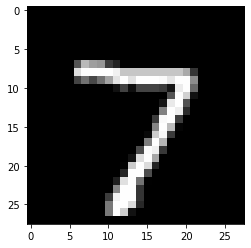

In [13]:
plt.imshow(x0[0], cmap='gray')

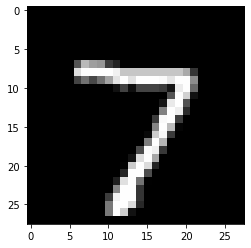

In [14]:
plt.imshow(x[0], cmap='gray')